In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

- analyze only the users and not the admins
- you can choose the color palette that you like for both of the graphs that you will
- need to draw in this exercise
- use the table checker for your query
- use absolute values of the commits, not the averages
- sort the dataframes by the total number of commits made by a user
- at the end of your Jupyter Notebook create a markdown cell and insert the questions
(answer them looking only at the graphs):

    “Which user has the most commits on Tue?” The answer: user_*.
    “Which user has the most commits on Thu?” The answer: user_*.
    “On which weekday do the users not like making a lot of commits?” The
    answer, for example: Mon.
    “Which user at which hour made the largest number of commits?” The answer,
    for example: user_1, 15

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [4]:
query = '''
SELECT uid, timestamp
FROM checker
WHERE uid LIKE 'user_%'
'''
data = pd.io.sql.read_sql(query, conn, parse_dates=['timestamp'])
data.head()

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370


In [5]:
data['weekday'] = data['timestamp'].dt.dayofweek
data['hour'] = data['timestamp'].dt.hour
data.drop('timestamp', axis=1, inplace=True)

In [9]:
df1 = data.groupby('uid') \
        .weekday.value_counts() \
            .unstack(0) \
                .reindex(columns=data.uid.value_counts().index.tolist()) \
                    .fillna(0)

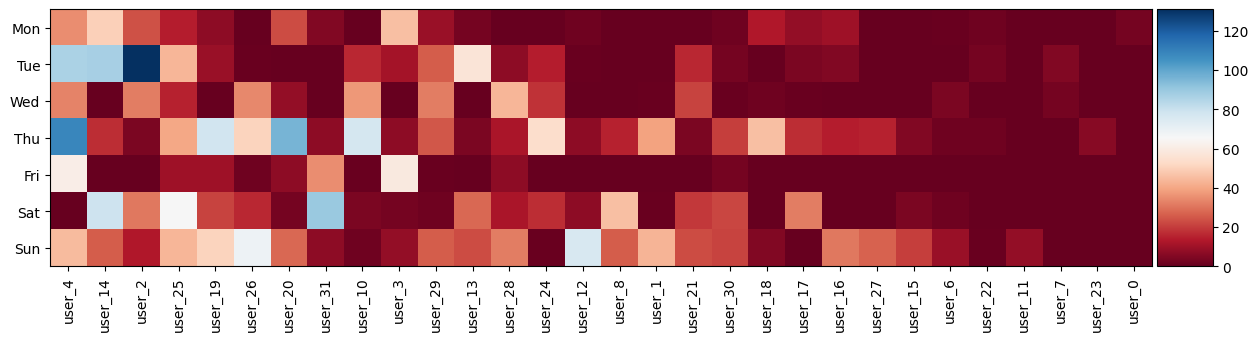

In [17]:
fig, ax = plt.subplots(figsize=(15, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
im = ax.imshow(df1, cmap='RdBu')
plt.colorbar(im, cax=cax)
plt.setp(ax.get_xticklabels(), rotation=90)
ax.set_xticks(range(df1.shape[1]))
ax.set_yticks(range(df1.shape[0]))
ax.set_xticklabels(df1.columns)
ax.set_yticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [13]:
df2 = data.groupby('uid') \
        .hour.value_counts() \
            .unstack(0) \
                .reindex(columns=data.uid.value_counts().index.tolist()) \
                    .fillna(0)

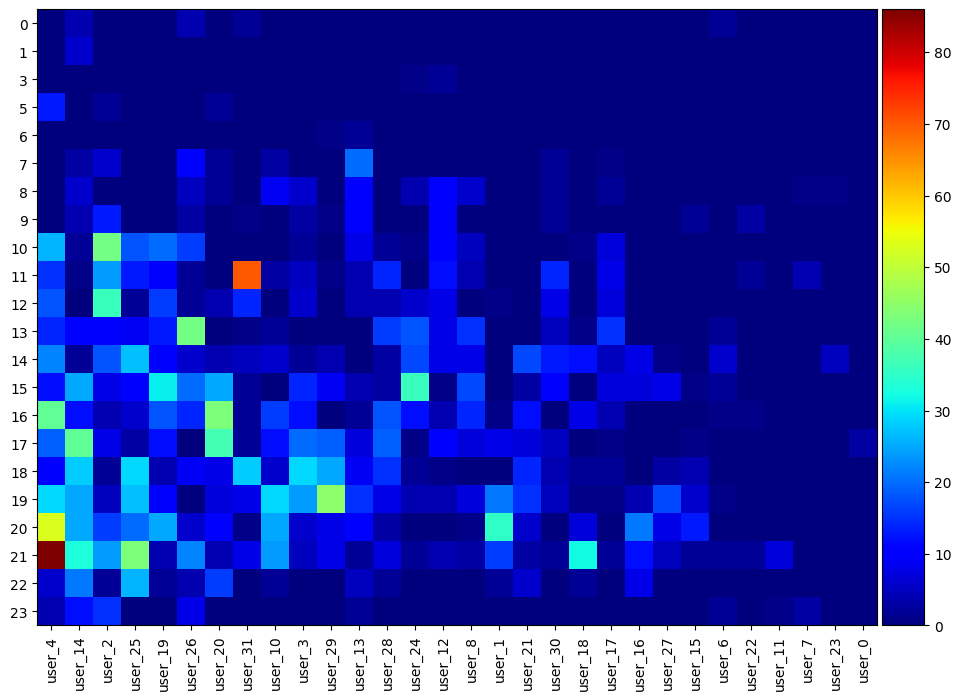

In [18]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.setp(ax.get_xticklabels(), rotation=90)
im = ax.imshow(df2, cmap='jet')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(im, cax=cax)
ax.set_xticks(range(df2.shape[1]))
ax.set_yticks(range(df2.shape[0]))
ax.set_xticklabels(df2.columns)
ax.set_yticklabels(df2.index)
plt.show()

In [19]:
conn.close()

- “Which user has the most commits on Tue?” The answer: user_2.
- “Which user has the most commits on Thu?” The answer: user_4.
- “On which weekday do the users not like making a lot of commits?” The
answer: Fri.
- “Which user at which hour made the largest number of commits?” The answer: user_4, 21